In [26]:
from PIL import Image
import numpy as np

def rgb_to_int(r,g,b):
    return (r<<16) + (g<<8) + b

def read_data(filename):
    coordinates = []
    colors = []
    back_color = rgb_to_int(255,255,255)
    
    image = Image.open(filename)
    col,row = image.size
    pixels = image.load()

    for i in range(row):
        for j in range(col):
            r,g,b = pixels[i,j]
            color = rgb_to_int(r,g,b)
            
            if (color != back_color):
                coordinates.append([i,j])
                colors.append(color)
    return coordinates,colors

coordinates,colors = read_data("data.png")


In [2]:
coordinates[0]

[0, 122]

In [3]:
coordinates[:10]

[[0, 122],
 [0, 123],
 [0, 124],
 [2, 11],
 [2, 12],
 [2, 13],
 [3, 11],
 [3, 12],
 [3, 13],
 [3, 126]]

In [4]:
colors[:10]

[255,
 255,
 255,
 16711680,
 16711680,
 16711680,
 16711680,
 16711680,
 16711680,
 255]

In [27]:
from sklearn.cross_validation import train_test_split
coordinates_train, coordinates_test, colors_train, colors_test = train_test_split(coordinates, colors, test_size=0.2)

In [6]:
from sklearn import svm
clf = svm.SVC()
clf.fit(coordinates_train, colors_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
colors_pred = clf.predict(coordinates_test)
colors_pred[:10]

array([16711680,      255, 16711680, 16711680, 16711680, 16711680,
       16711680,      255, 16711680,      255])

In [33]:
#test cu parametrii modificati
from sklearn import svm
clf = svm.SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)
clf.fit(coordinates_train, colors_train) 
from sklearn.metrics import accuracy_score
colors_pred = clf.predict(coordinates_test)
colors_pred[:10]


array([     255,      255, 16711680, 16711680, 16711680,      255,
            255,      255, 16711680,      255])

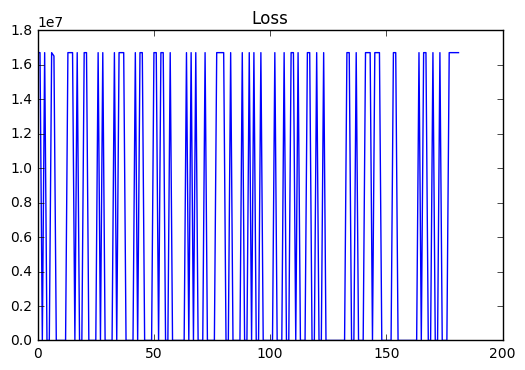

In [29]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


loss=abs(colors_test-colors_pred)
plt.plot(range(len(colors_test)), loss)

plt.title('Loss')
plt.xlabel=('Predicted Values')
plt.ylabel=('Loss')
plt.show()


In [30]:
from sklearn.metrics import accuracy_score
accuracy0=accuracy_score(colors_test, colors_pred)
accuracy0

0.62637362637362637

In [22]:
def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue


def save_data(width, height, pixels, colors):
    
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
             pix[pixels[i][0],pixels[i][1]] = getRGBfromI(colors[i])

    im.save("test0.png", "PNG")    
    
points = []
for i in range (200): #this is hardcoded
    for j in range(200):
        points.append([i,j])

pred_colors = clf.predict(points)

save_data(200,200,points,pred_colors)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(coordinates, colors, test_size=0.3)

In [31]:
from sklearn import svm
svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(coordinates_train, colors_train) 


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [14]:
colors_pred = clf.predict(coordinates_test)
colors_pred[:10]

array([16711680,      255, 16711680, 16711680, 16711680, 16711680,
       16711680,      255, 16711680,      255])

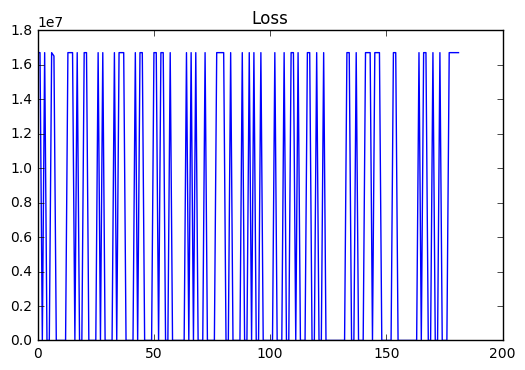

In [32]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

accuracy=abs(colors_test-colors_pred)
plt.plot(range(len(colors_test)), accuracy)

plt.title('Loss')
plt.xlabel=('Predicted Values')
plt.ylabel=('Loss')
plt.show()


In [16]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(colors_test, colors_pred)
accuracy1

1.0

In [17]:
deltaAccuracy=accuracy0-accuracy1
deltaAccuracy

0.0

In [18]:

def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue


def save_data(width, height, pixels, colors):
    
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
             pix[pixels[i][0],pixels[i][1]] = getRGBfromI(colors[i])

    im.save("test1.png", "PNG")    
    
points = []
for i in range (200): #this is hardcoded
    for j in range(200):
        points.append([i,j])

pred_colors = clf.predict(points)

save_data(200,200,points,pred_colors)